In [ ]:
a = "Joao"
b = "Alberto"
c = a + b
print(c)


In [ ]:
print(type(c))

In [ ]:
c[3]

In [ ]:
lista1 = []

In [ ]:
lista2 = []
for i in range(10):
    lista2.append(i)

lista2



In [ ]:
tupla = ("x","y")

In [ ]:
tupla[1]

In [3]:
dict1 = {'nome':'Roberto',
        'idade': 64,
        'altura':1.85
}
dict1['idade']

64

In [2]:
import pandas as pd
from datetime import date, timedelta
import numpy as np
import matplotlib.pyplot as plt

<AxesSubplot:>

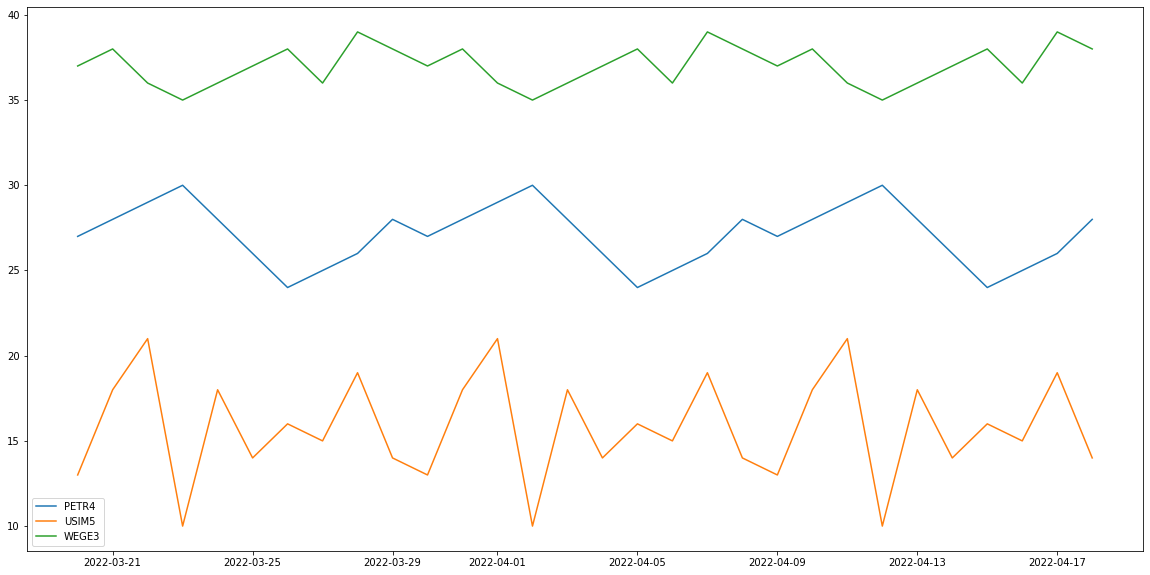

In [9]:
dict2 = {'PETR4':[27,28,29,30,28,26,24,25,26,28,27,28,29,30,28,26,24,25,26,28,27,28,29,30,28,26,24,25,26,28],
        'USIM5':[13,18,21,10,18,14,16,15,19,14,13,18,21,10,18,14,16,15,19,14,13,18,21,10,18,14,16,15,19,14],
        'WEGE3':[37,38,36,35,36,37,38,36,39,38,37,38,36,35,36,37,38,36,39,38,37,38,36,35,36,37,38,36,39,38]}

data_inicial = date.today()

datas = [data_inicial + timedelta(days = i) for i in range(30)]

df = pd.DataFrame(dict2, index = datas)

df.plot(figsize = (20,10))


array([[<AxesSubplot:title={'center':'PETR4'}>,
        <AxesSubplot:title={'center':'USIM5'}>],
       [<AxesSubplot:title={'center':'WEGE3'}>, <AxesSubplot:>]],
      dtype=object)

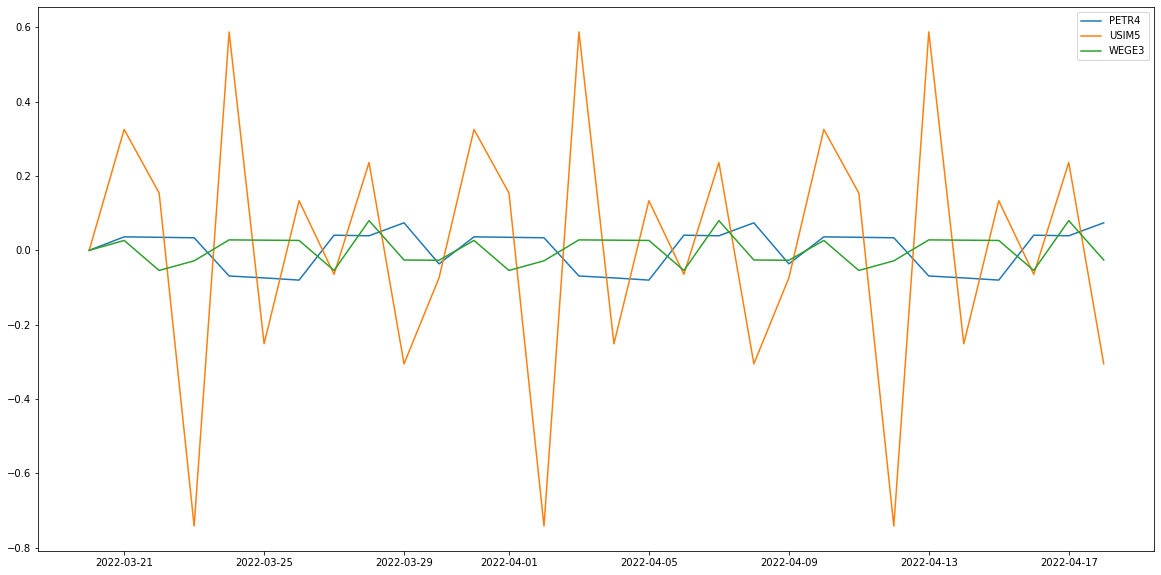

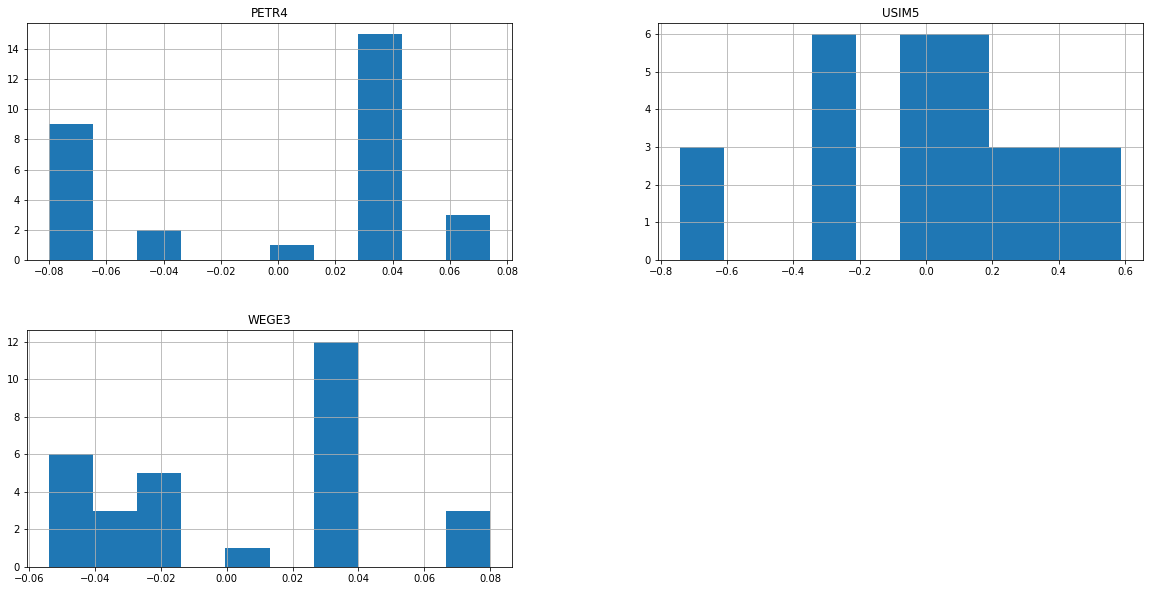

In [13]:
df_log_returns = np.log(df / df.shift(1)).fillna(0)
df_log_returns.plot(figsize = (20,10))
df_log_returns.hist(figsize = (20,10))

Text(0.5, 0.98, 'Meu primeiro estudo')

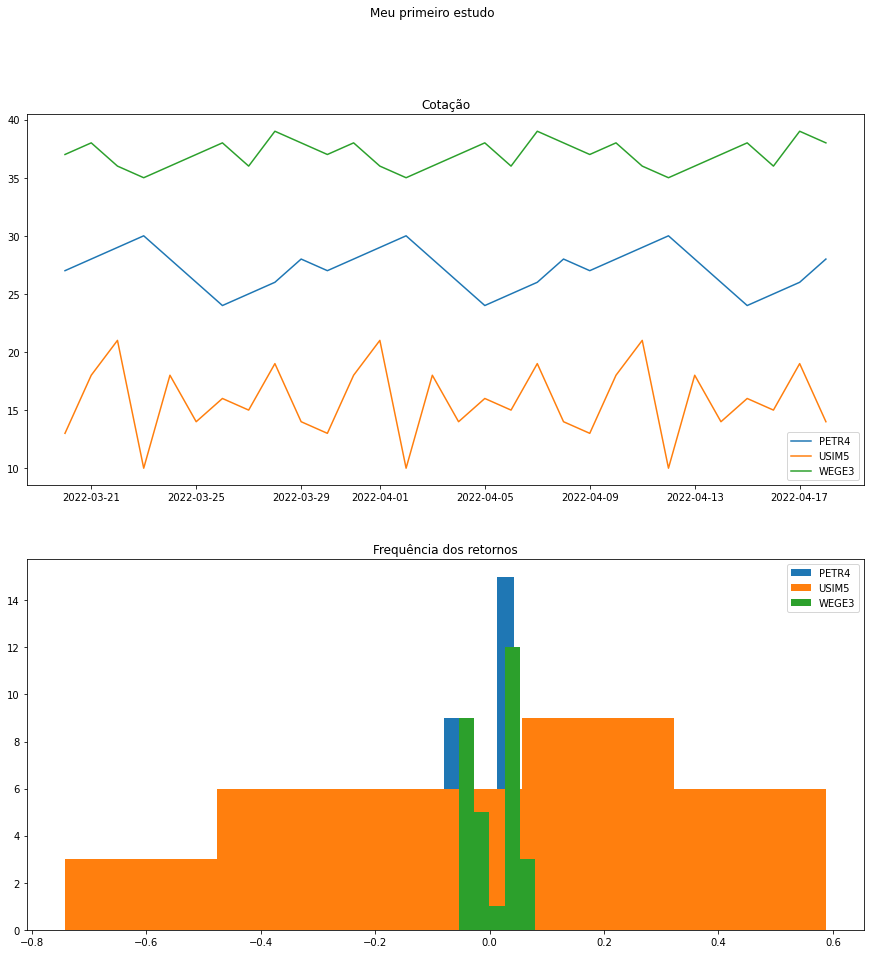

In [21]:
fig, [ax1,ax2] = plt.subplots(2,1, figsize = (15,15))

lista_ativos_df = list(df.keys())

for i in lista_ativos_df:
    ax1.plot(datas,df[i])
    ax2.hist(df_log_returns[i],bins = 5)

ax1.legend(lista_ativos_df)
ax2.legend(lista_ativos_df)

ax1.set_title('Cotação')
ax2.set_title('Frequência dos retornos')

fig.suptitle('Meu primeiro estudo')


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime,timedelta
import yfinance as yf


In [18]:
chamada_api = yf.Ticker('PETR4.SA').history(period='36mo')

In [19]:
chamada_api

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2019-03-18,22.300214,22.646320,22.229420,22.606989,91920600,0.0,0
2019-03-19,22.693520,23.204813,22.496869,22.968832,69423600,0.0,0
2019-03-20,22.968832,23.283474,22.732850,22.787912,68878000,0.0,0
2019-03-21,22.685650,22.787908,21.961975,22.465401,80121300,0.0,0
2019-03-22,21.977708,22.135028,21.238300,21.238300,104731100,0.0,0
...,...,...,...,...,...,...,...
2022-03-14,32.430000,32.889999,31.520000,31.870001,52274100,0.0,0
2022-03-15,31.139999,31.540001,30.469999,31.100000,66272000,0.0,0
2022-03-16,31.500000,31.540001,30.370001,30.830000,72034900,0.0,0


In [20]:
symbol_list = ['PETR4.SA','USIM5.SA','CSNA3.SA','SBSP3.SA']

df1 = pd.DataFrame()
contador = 0
datas = []
for ativo in symbol_list:
    chamada_api = yf.Ticker(ativo).history(period='36mo')
    closes = chamada_api['Close'].values
    df1[ativo] = closes
    if contador == 0:
        contador += 1
        datas.append(list(chamada_api.index))

df1['Datas'] = datas[0]
df1 = df1.set_index('Datas', drop=True)
df1

,PETR4.SA,USIM5.SA,CSNA3.SA,SBSP3.SA
Datas,,,,
2019-03-18,22.606991,9.402068,13.825212,41.147182
2019-03-19,22.968832,9.900731,13.299347,40.810604
2019-03-20,22.787909,9.719400,13.485943,40.184181
2019-03-21,22.465401,9.474602,13.214530,39.221188
2019-03-22,21.238298,9.102871,12.688662,37.510227
...,...,...,...,...
2022-03-14,31.870001,13.970000,24.370001,42.430000
2022-03-15,31.100000,13.370000,23.350000,42.730000
2022-03-16,30.830000,13.660000,23.900000,43.279999


<AxesSubplot:xlabel='Datas'>

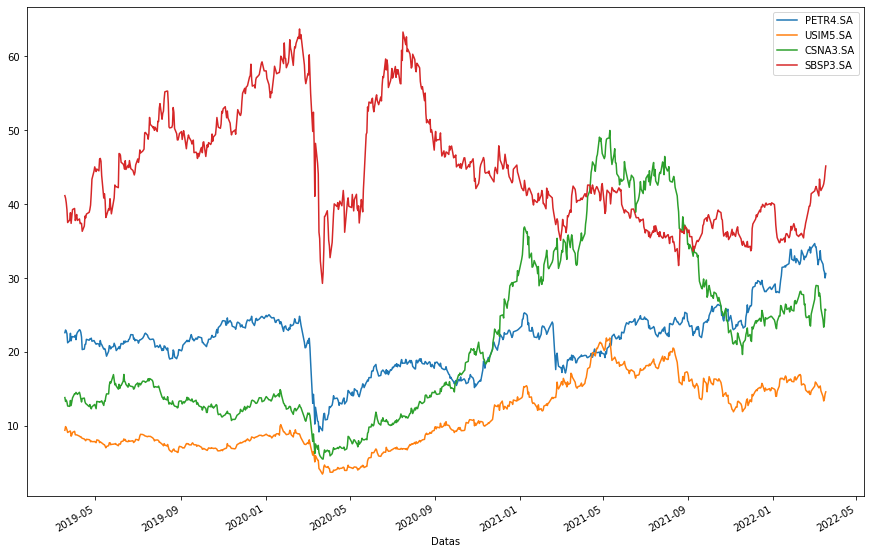

In [21]:
df1.plot(figsize = (15,10))

In [22]:
df1_log_returns = np.log(df1 / df1.shift(1)).fillna(0)
df1_log_returns.describe()

,PETR4.SA,USIM5.SA,CSNA3.SA,SBSP3.SA
count,746.000000,746.000000,746.000000,746.000000
mean,0.000406,0.000590,0.000830,0.000125
std,0.032560,0.035529,0.037774,0.027653
min,-0.352367,-0.238675,-0.291590,-0.196380
25%,-0.012245,-0.015947,-0.019544,-0.013566
50%,0.000878,-0.001028,-0.000759,0.000221
75%,0.014817,0.017760,0.019938,0.014071
max,0.200671,0.193863,0.189137,0.160930


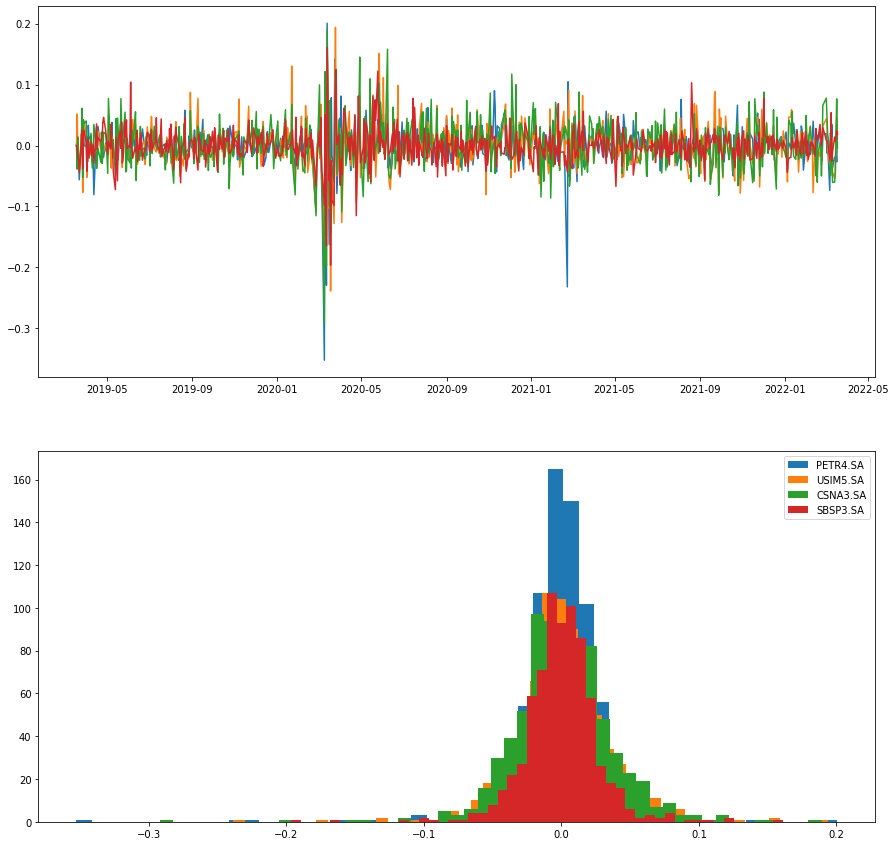

In [23]:
fig2, [ax1,ax2] = plt.subplots(2,1, figsize = (15,15))

for ativo in symbol_list:
    ax1.plot(datas[0],df1_log_returns[ativo].values)
    ax2.hist(df1_log_returns[ativo].values,bins = 50)

ax2.legend(symbol_list)
plt.show()




In [4]:
symbol_list_ibrx = list(pd.read_excel('C:/projeto_python/ibrx.xls')['Código'].values)
symbol_list_ibrx

['RRRP3',
 'ALPA4',
 'ABEV3',
 'AMER3',
 'ASAI3',
 'AZUL4',
 'B3SA3',
 'BIDI11',
 'BPAN4',
 'BBSE3',
 'BRML3',
 'BBDC3',
 'BBDC4',
 'BRAP4',
 'BBAS3',
 'BRKM5',
 'BRFS3',
 'BPAC11',
 'CRFB3',
 'CCRO3',
 'CMIG4',
 'CESP6',
 'CIEL3',
 'COGN3',
 'CPLE6',
 'CSAN3',
 'CPFE3',
 'CMIN3',
 'CVCB3',
 'CYRE3',
 'DXCO3',
 'ECOR3',
 'ELET3',
 'ELET6',
 'EMBR3',
 'ENBR3',
 'ENGI11',
 'ENEV3',
 'EGIE3',
 'EQTL3',
 'EZTC3',
 'FLRY3',
 'GGBR4',
 'GOAU4',
 'GOLL4',
 'NTCO3',
 'SOMA3',
 'HAPV3',
 'HYPE3',
 'IGTI11',
 'IRBR3',
 'ITSA4',
 'ITUB4',
 'JBSS3',
 'KLBN11',
 'LIGT3',
 'RENT3',
 'LCAM3',
 'LWSA3',
 'AMAR3',
 'LREN3',
 'MGLU3',
 'MRFG3',
 'CASH3',
 'BEEF3',
 'MOVI3',
 'MRVE3',
 'MULT3',
 'PCAR3',
 'PETR3',
 'PETR4',
 'PRIO3',
 'PETZ3',
 'PSSA3',
 'POSI3',
 'QUAL3',
 'RADL3',
 'RDOR3',
 'RAIL3',
 'SBSP3',
 'SANB11',
 'STBP3',
 'CSNA3',
 'SLCE3',
 'SULA11',
 'SUZB3',
 'TAEE11',
 'VIVT3',
 'TIMS3',
 'TOTS3',
 'UGPA3',
 'USIM5',
 'VALE3',
 'VIIA3',
 'VBBR3',
 'WEGE3',
 'YDUQ3']

In [5]:
df_scan = pd.DataFrame()
for ativo in symbol_list_ibrx:
    df2 =pd.DataFrame()
    chamada_api = yf.Ticker(ativo+'.SA')
    closes = chamada_api.history(period='36mo')['Close'].values
    dividendos = chamada_api.history(period='36mo')['Dividends'].values
    datas = list(chamada_api.history(period='36mo').index)
    

    df2['Closes'] = closes
    df2['Dividendos'] = dividendos
    df2['Datas'] = datas
    df2 = df2.set_index('Datas',drop = True)

    soma_dividendos = 0

    for k,v in df2.iterrows():
        if k.year == 2020 or k.year == 2021:
            soma_dividendos += v['Dividendos']
    
    dividend_yield = ((soma_dividendos/2) / df2['Closes'].values[-1] )*100

    df_scan[ativo] = [dividend_yield]

df_scan.transpose().sort_values(by = 0,ascending=False)[:20]



,0
BRAP4,16.188985
CPFE3,11.229050
BBSE3,10.861652
GOAU4,10.220769
CPLE6,9.923475
CYRE3,9.830662
MRFG3,9.648883
CESP6,9.420144
PETR3,9.279873
TAEE11,9.091167
